In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [106]:
df=pd.read_csv(r"D:\Downloads\Housing\housing.csv")

In [107]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [108]:
X = df.drop("MEDV", axis=1)  # fitur: RM, LSTAT, PTRATIO
y = df["MEDV"]               # target: harga rumah

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Inisialisasi dan latih model Decision Tree

DecisionTreeRegressor(random_state=42)

In [111]:
y_pred = tree.predict(X_test)

In [112]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 6396165000.0
R2 Score: 0.7089688992980032


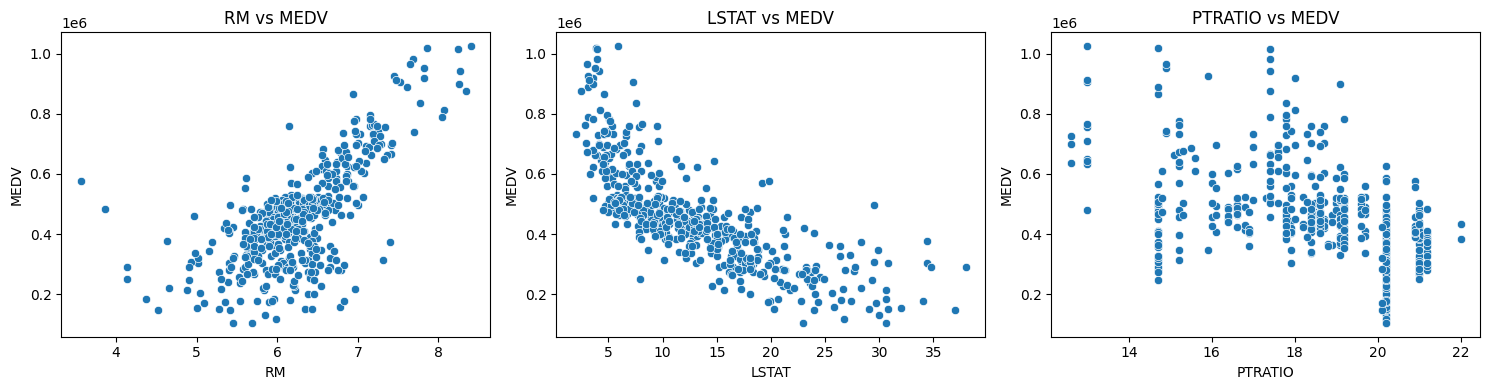

In [113]:
plt.figure(figsize=(15, 4))

for i, col in enumerate(X.columns):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df, x=col, y="MEDV")
    plt.title(f'{col} vs MEDV')

plt.tight_layout()
plt.show()

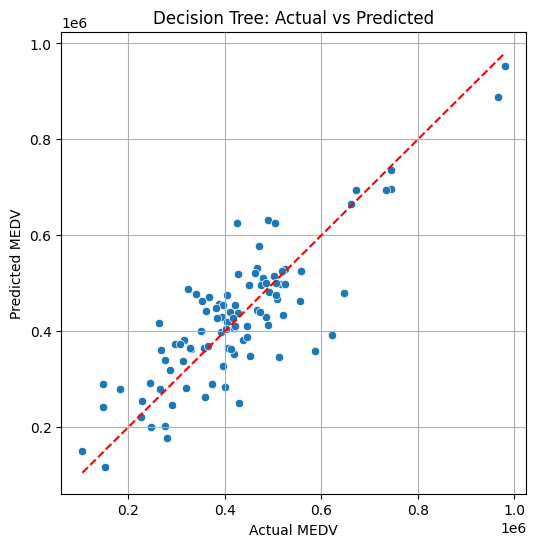

In [114]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Decision Tree: Actual vs Predicted")
plt.grid(True)
plt.show()